In [82]:
#importing all the necessary libraries and packages to download

import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud, STOPWORDS
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
#Accessing the amazon reviews csv file and storing it in a dataframe

train = pd.read_csv('/content/drive/MyDrive/DS/Amazon Reviews/amazon_vfl_reviews.csv')
train.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...


In [4]:
train.shape

(2782, 5)

In [5]:
train.isnull().sum()

asin      0
name      0
date      0
rating    0
review    4
dtype: int64

In [6]:
#deleting the 4 rows that have nan values
train.dropna(inplace=True)

In [7]:
train.reset_index(inplace=True)

In [8]:
train.head()

,index,asin,name,date,rating,review
0,0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...


In [9]:
for reviews in train.review:
  if reviews.isdigit():
    print("true")

We can see that there are no digits in the reviews column


In [10]:
def cleanText(input_string):
  modified_string = re.sub('[^A-Za-z0–9]+', ' ', input_string)
  return modified_string

train['review'] = train.review.apply(cleanText)
train['review'][50]

'Nice one My yr old son likes to brush with this flavour strawberry Previously I used to use Chicco but switched to this one due to good reviews and lower price I had used Mee Mee also but this one s ingredients are better for my child s health '

In [11]:
#Taking out the brand name from the name column and creating a separate column for itself.
train['Brand'] = train.name.str.split('-').str[0]
train.head()

,index,asin,name,date,rating,review,Brand
0,0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,Mamaearth
1,1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth
2,2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product My hair falling increase too mu...,Mamaearth
3,3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...,Mamaearth
4,4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...,Mamaearth


In [12]:
train.Brand = train.Brand.str.lower()

In [13]:
train.Brand.unique()

array(['mamaearth', 'godrej', 'titan', 'maaza', 'paper', 'indiana',
       'coca', 'natural', 'maggi', 'glucon', 'amul', 'patanjali',
       'dettol', 'savlon', 'cinthol', 'britannia', 'nutrichoice',
       'streax', 'himalaya', 'society', 'tata', 'fastrack', 'reflex',
       'mysore'], dtype=object)

In [14]:
len(train.Brand.unique())

24

In [17]:
#Taking out the Product name from the name column and creating a separate column for itself.
train['Product'] = train.name.str.split('-').str[1:]
train.head(1)

,index,asin,name,date,rating,review,Brand,Product
0,0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,mamaearth,"[Onion, Growth, Control, Redensyl]"


In [18]:
#for word in train.Product:
print(train.Product[0])

['Onion', 'Growth', 'Control', 'Redensyl']


In [19]:
train['Product'] = train['Product'].apply(lambda x: ' '.join(map(str, x)))

In [20]:
train.head(2)

,index,asin,name,date,rating,review,Brand,Product
0,0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,mamaearth,Onion Growth Control Redensyl
1,1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,mamaearth,Onion Growth Control Redensyl


#Visualizing the data from the dataframe

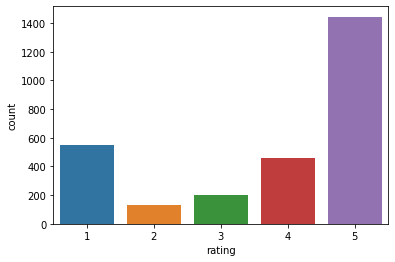

In [15]:
sns.countplot(x='rating', data=train)

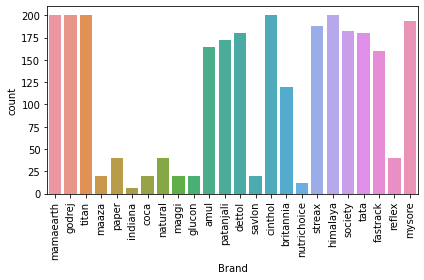

In [16]:
sns.countplot(x='Brand', data=train)
plt.xticks(rotation=90)
plt.tight_layout()

#Converting to the review column for better use

In [21]:
#Converting to lower case
train['review_text']=train['review'].str.lower()

In [22]:
#Removing the punctuations
train['review_text']=train['review_text'].str.translate(str.maketrans('','',string.punctuation))

In [23]:
train.head(2)

,index,asin,name,date,rating,review,Brand,Product,review_text
0,0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,mamaearth,Onion Growth Control Redensyl,i bought this hair oil after viewing so many g...
1,1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,mamaearth,Onion Growth Control Redensyl,used this mama earth newly launched onion oil ...


In [24]:
stop = stopwords.words('english')

In [25]:
#Creating a column that has no stopwords in the review
train['without_stopwords'] = train['review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [26]:
train.head(4)

,index,asin,name,date,rating,review,Brand,Product,review_text,without_stopwords
0,0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,mamaearth,Onion Growth Control Redensyl,i bought this hair oil after viewing so many g...,bought hair oil viewing many good comments pro...
1,1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,mamaearth,Onion Growth Control Redensyl,used this mama earth newly launched onion oil ...,used mama earth newly launched onion oil twice...
2,2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product My hair falling increase too mu...,mamaearth,Onion Growth Control Redensyl,so bad product my hair falling increase too mu...,bad product hair falling increase much order s...
3,3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...,mamaearth,Onion Growth Control Redensyl,product just smells similar to navarathna hair...,product smells similar navarathna hair oil str...


In [27]:
len(train.review_text[0])

466

In [28]:
train.Brand.unique()

array(['mamaearth', 'godrej', 'titan', 'maaza', 'paper', 'indiana',
       'coca', 'natural', 'maggi', 'glucon', 'amul', 'patanjali',
       'dettol', 'savlon', 'cinthol', 'britannia', 'nutrichoice',
       'streax', 'himalaya', 'society', 'tata', 'fastrack', 'reflex',
       'mysore'], dtype=object)

In [29]:
train['Brand'] = train['Brand'].str.replace('mamaearth','mama earth')

In [30]:
train.Brand.dtypes

dtype('O')

In [31]:
train.without_stopwords[0]

'bought hair oil viewing many good comments product good enough first expensive second thing amount product low half bottle yes bottle completely filled oil cheating customers mamaearth trust fool people know brand good enough going buy product brand thumbs mamaearth onion oil'

In [32]:
train.rating[0]

1

In [41]:
#Creating a new column after tokenization of the review_text column
tokenList=[]
for indx in range(len(train.review)):
       token=word_tokenize(train['review_text'][indx])
       tokenList.append(token)
train['review_tokens'] = tokenList
train.head()

,index,asin,name,date,rating,review,Brand,Product,review_text,without_stopwords,review_tokens
0,0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,mama earth,Onion Growth Control Redensyl,i bought this hair oil after viewing so many g...,bought hair oil viewing many good comments pro...,"[i, bought, this, hair, oil, after, viewing, s..."
1,1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,mama earth,Onion Growth Control Redensyl,used this mama earth newly launched onion oil ...,used mama earth newly launched onion oil twice...,"[used, this, mama, earth, newly, launched, oni..."
2,2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product My hair falling increase too mu...,mama earth,Onion Growth Control Redensyl,so bad product my hair falling increase too mu...,bad product hair falling increase much order s...,"[so, bad, product, my, hair, falling, increase..."
3,3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...,mama earth,Onion Growth Control Redensyl,product just smells similar to navarathna hair...,product smells similar navarathna hair oil str...,"[product, just, smells, similar, to, navarathn..."
4,4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...,mama earth,Onion Growth Control Redensyl,i have been trying different onion oil for my ...,trying different onion oil hair hair healthy p...,"[i, have, been, trying, different, onion, oil,..."


In [45]:
#Creating the sentiment for the review column data through SentimentIntensityAnalyzer method

sentiment_model = SentimentIntensityAnalyzer()
sentiment_scores=[]
sentiment_score_flag = []
for text in train['review_text']:
        sentimentResults = sentiment_model.polarity_scores(text)
        sentiment_score = sentimentResults["compound"]
        #print(sentimentResults)
        #The compound value reflects the overall sentiment ranging from -1 being very negative and +1 being very positive.
        sentiment_scores.append(sentiment_score)
        # marking the sentiments as positive, negative and neutral 
        if sentimentResults['compound'] >= 0.05 : 
            sentiment_score_flag.append('positive')
  
        elif sentimentResults['compound'] <= - 0.05 : 
            sentiment_score_flag.append('negative')
  
        else : 
            sentiment_score_flag.append('neutral')
            
train['scores']=sentiment_scores
train['scoreStatus'] = sentiment_score_flag

In [46]:
train.head(2)

,index,asin,name,date,rating,review,Brand,Product,review_text,without_stopwords,review_tokens,scores,scoreStatus
0,0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,mama earth,Onion Growth Control Redensyl,i bought this hair oil after viewing so many g...,bought hair oil viewing many good comments pro...,"[i, bought, this, hair, oil, after, viewing, s...",0.8033,positive
1,1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,mama earth,Onion Growth Control Redensyl,used this mama earth newly launched onion oil ...,used mama earth newly launched onion oil twice...,"[used, this, mama, earth, newly, launched, oni...",0.8689,positive


In [49]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

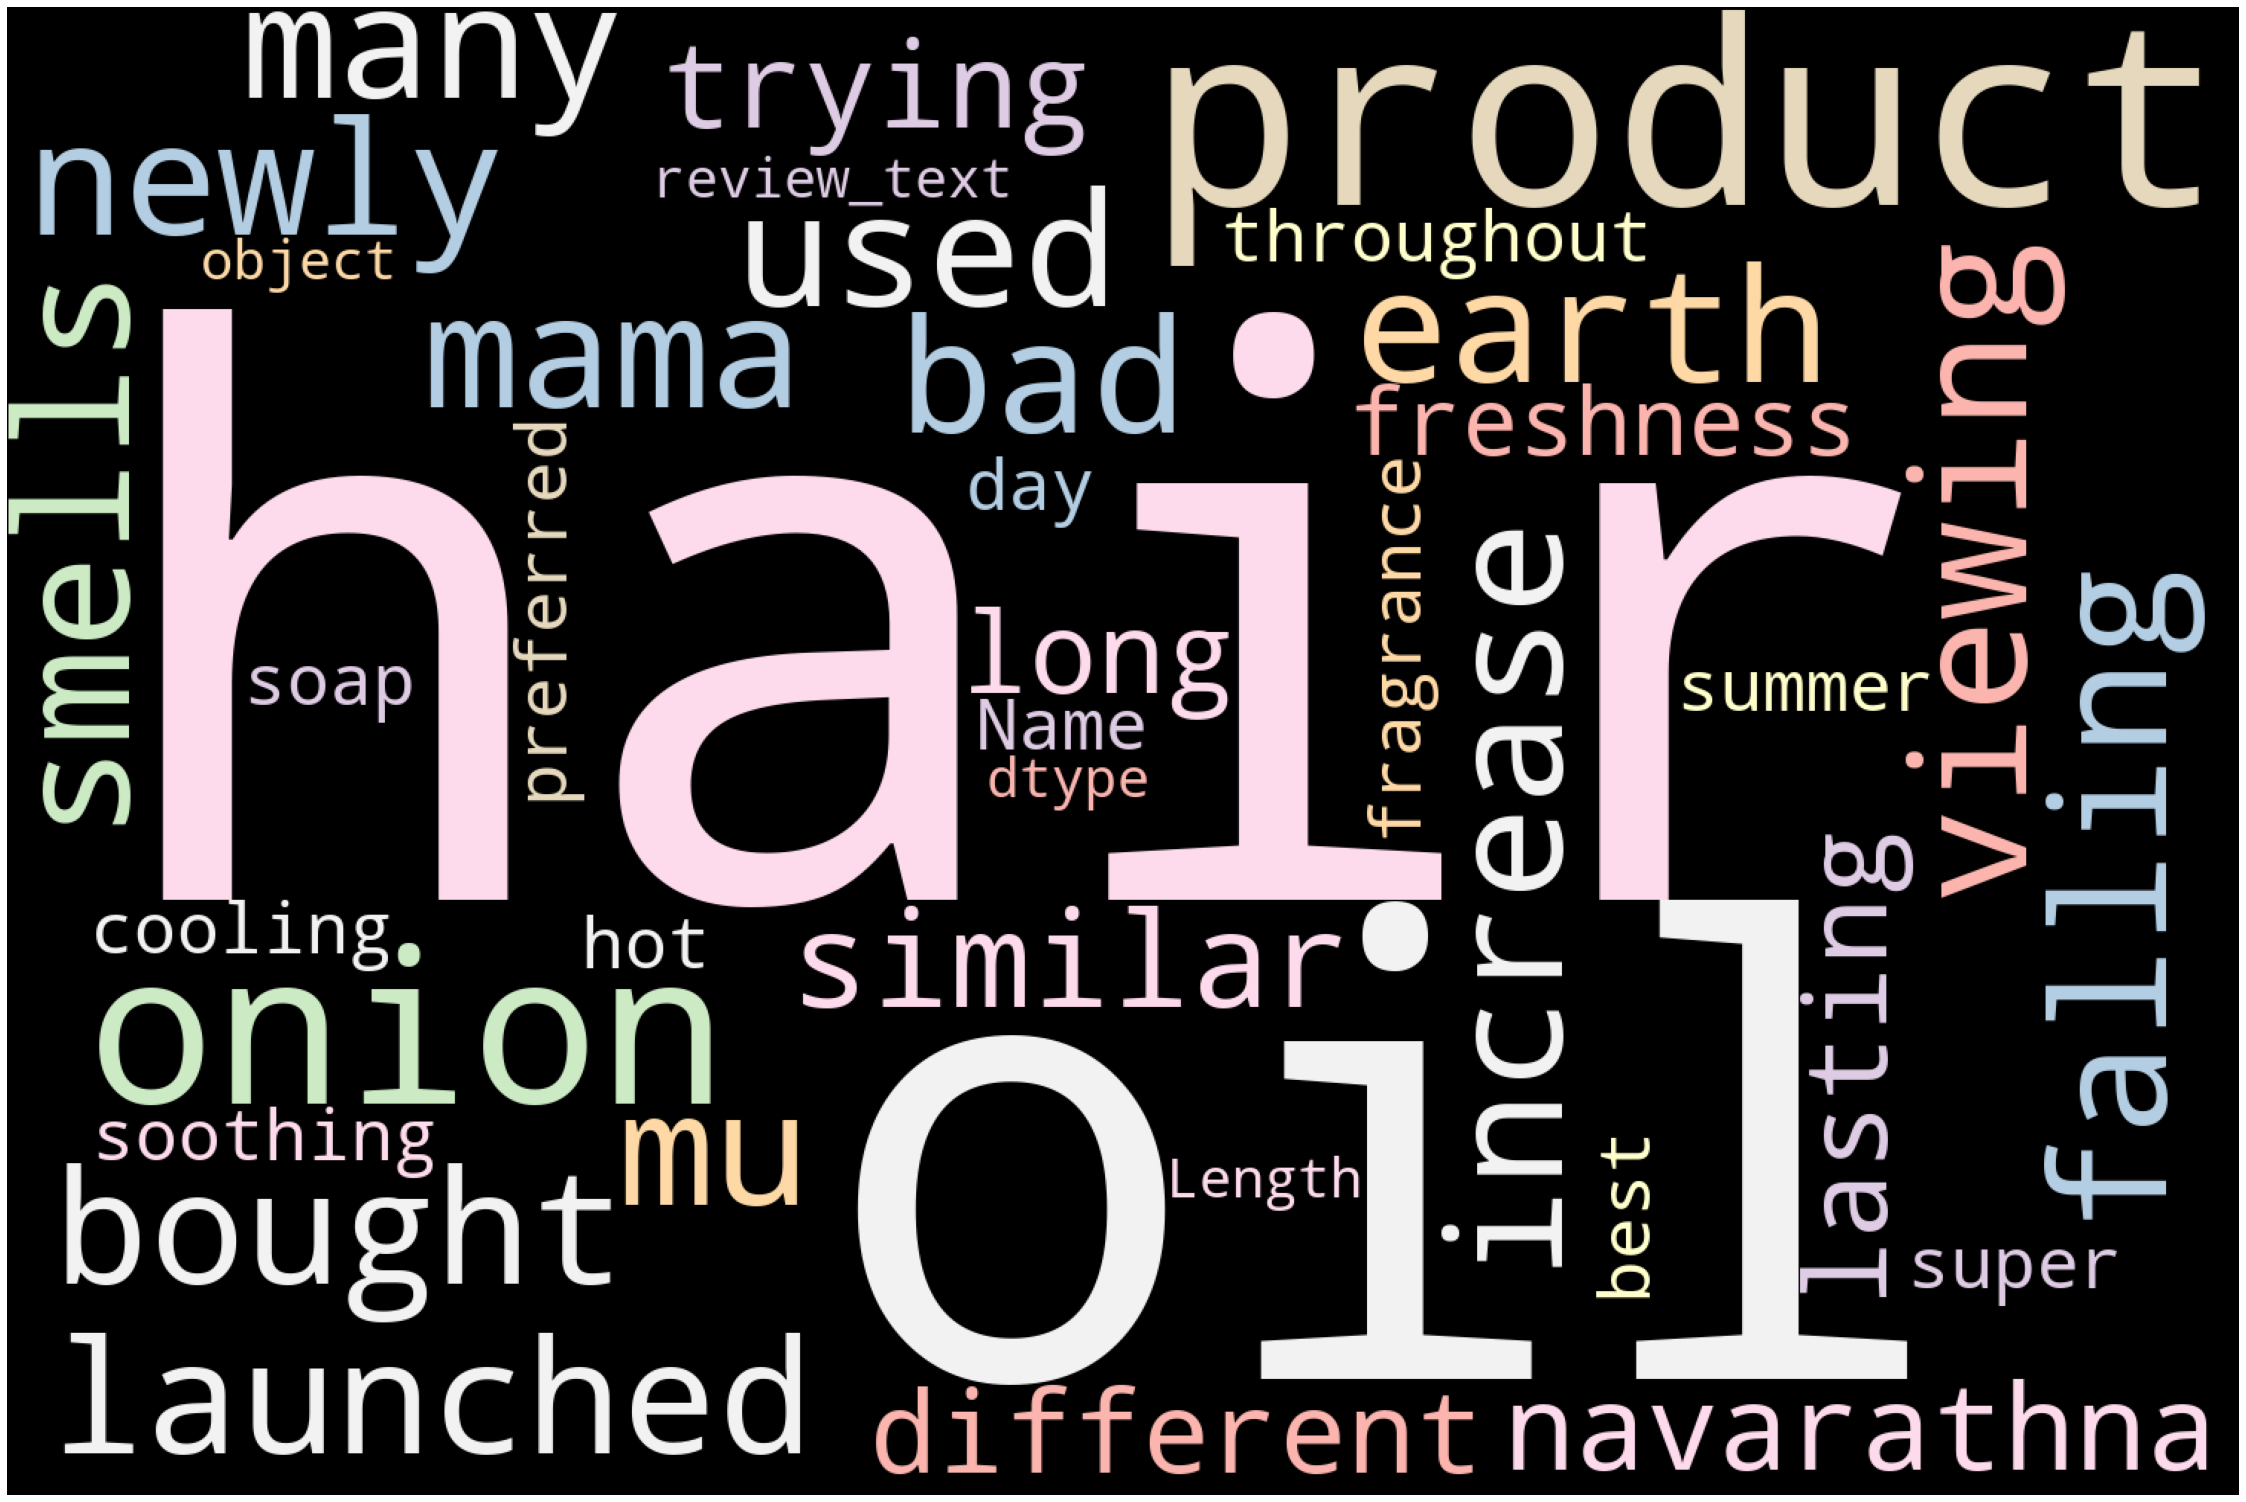

In [57]:
# Generate word cloud
wordcloud = WordCloud(width = 1500, height = 1000, random_state=1, background_color='black', colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS).generate(str(train.review_text))
# Plot
plot_cloud(wordcloud)

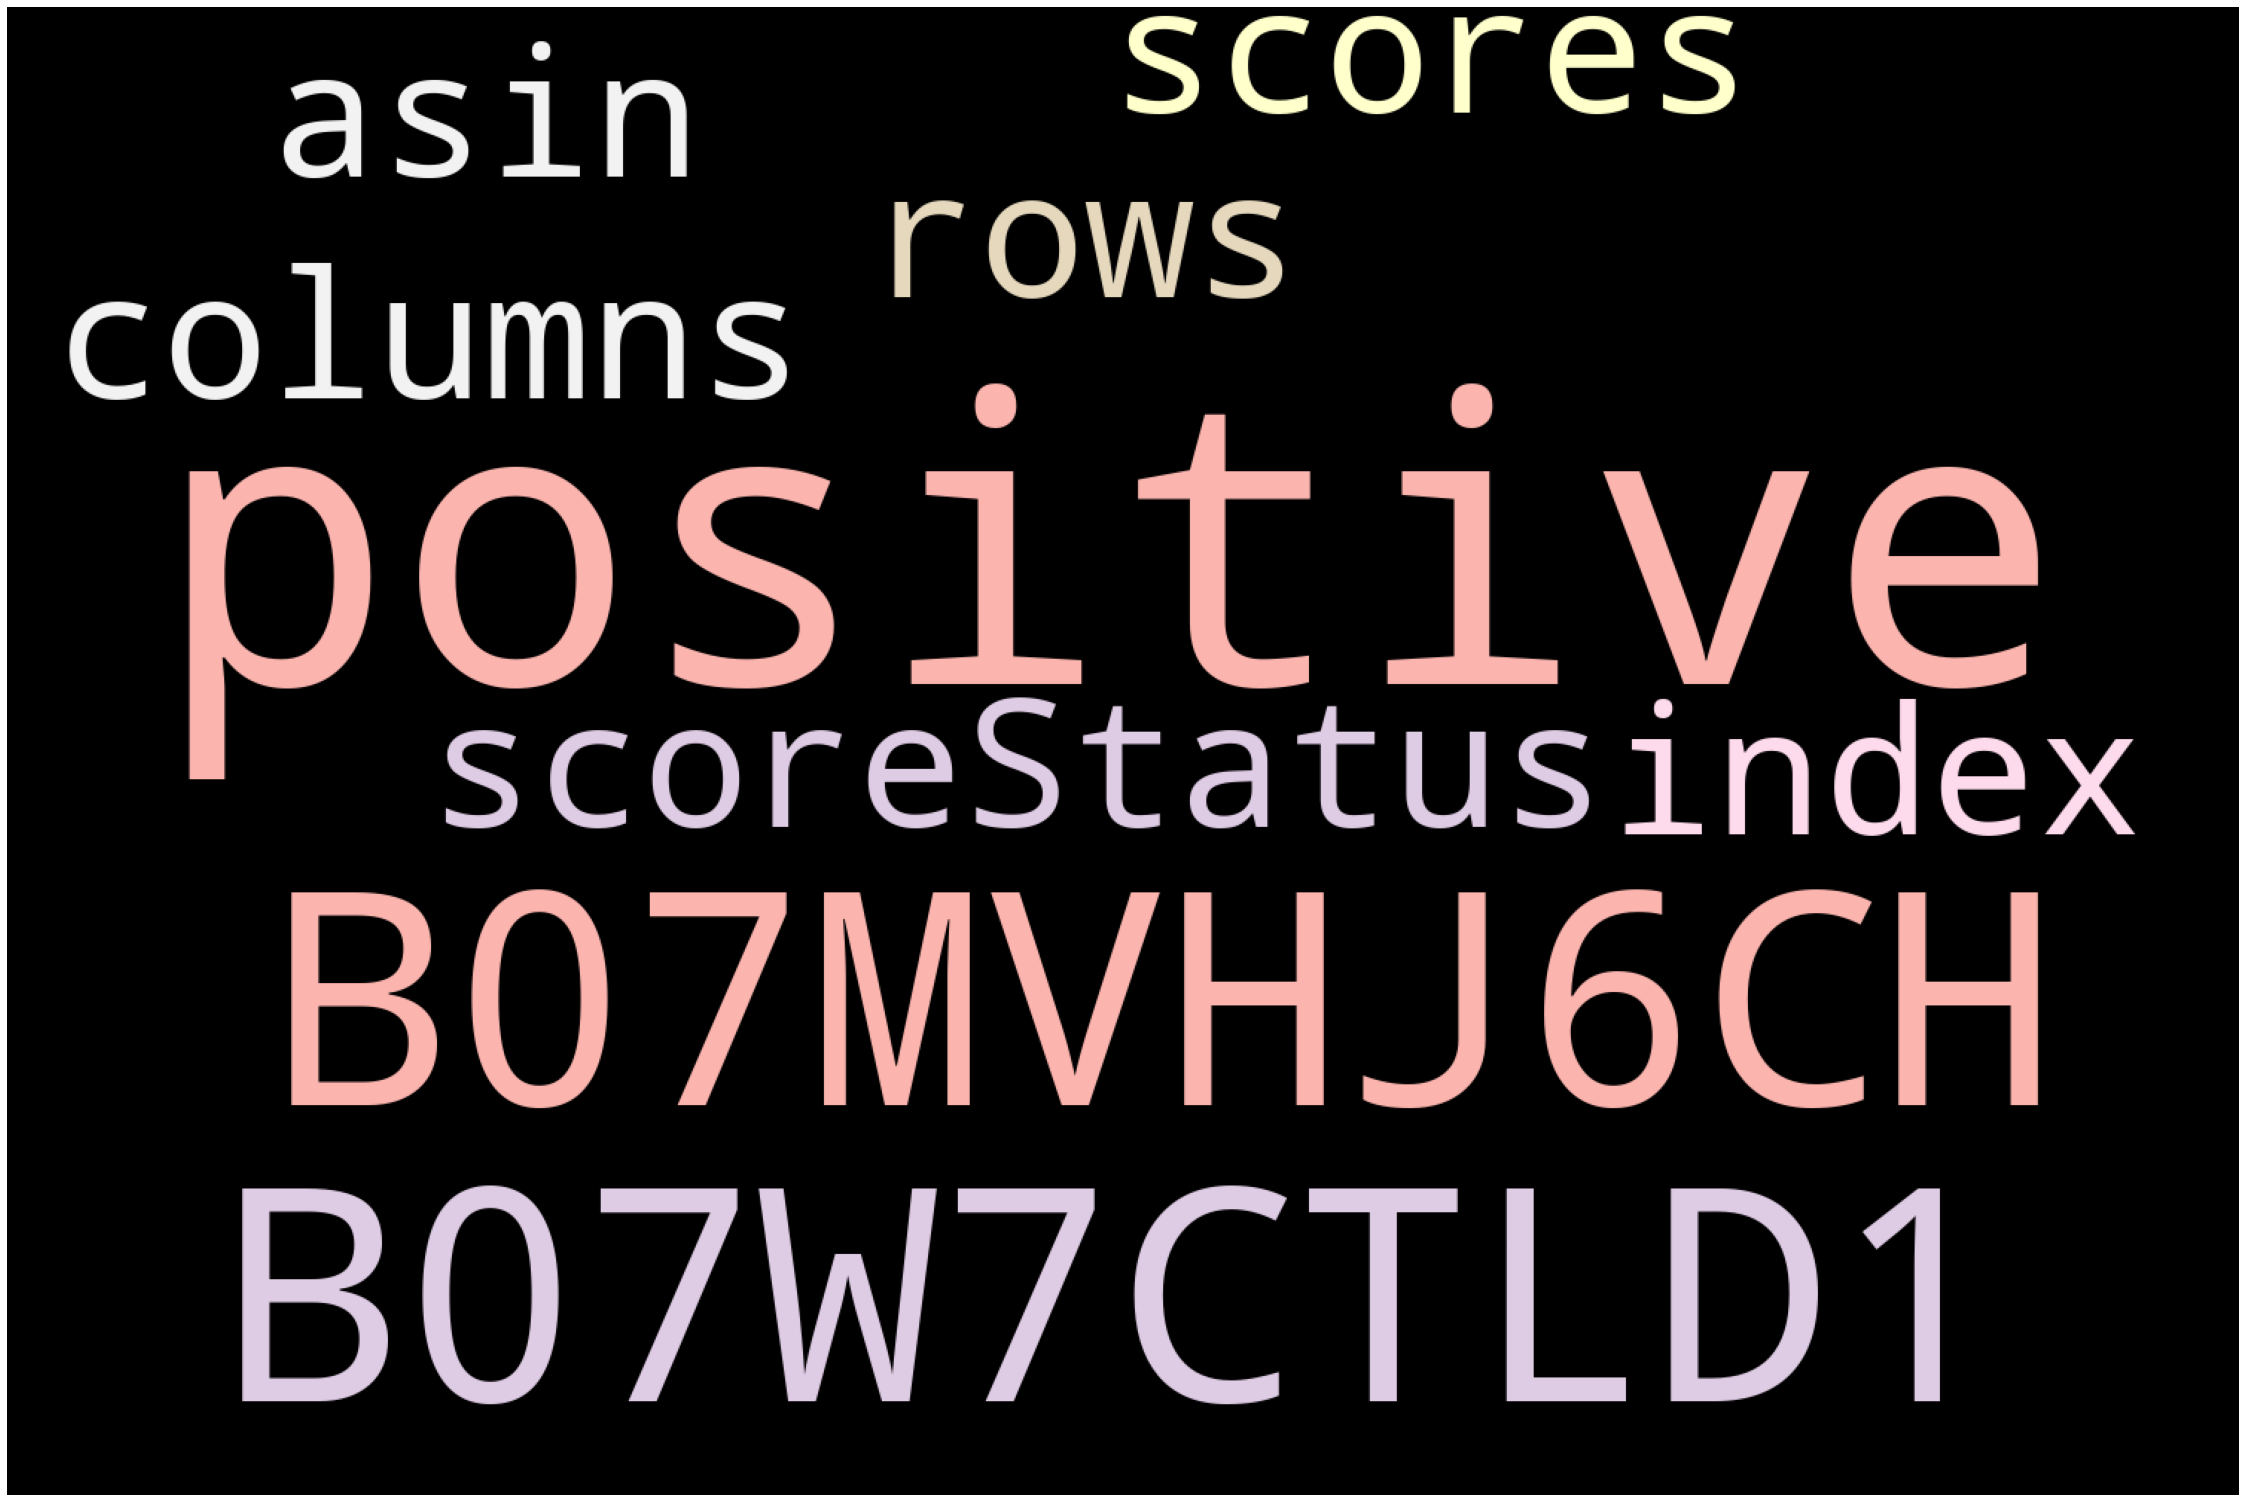

In [63]:
# print wordcloud
positiveReviews =train.loc[train['scoreStatus'] == "positive"]
#positiveReviews

# Generate word cloud
wordcloud = WordCloud(width = 1500, height = 1000, random_state=1, background_color='black', colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS).generate(str(positiveReviews))
# Plot
plot_cloud(wordcloud)

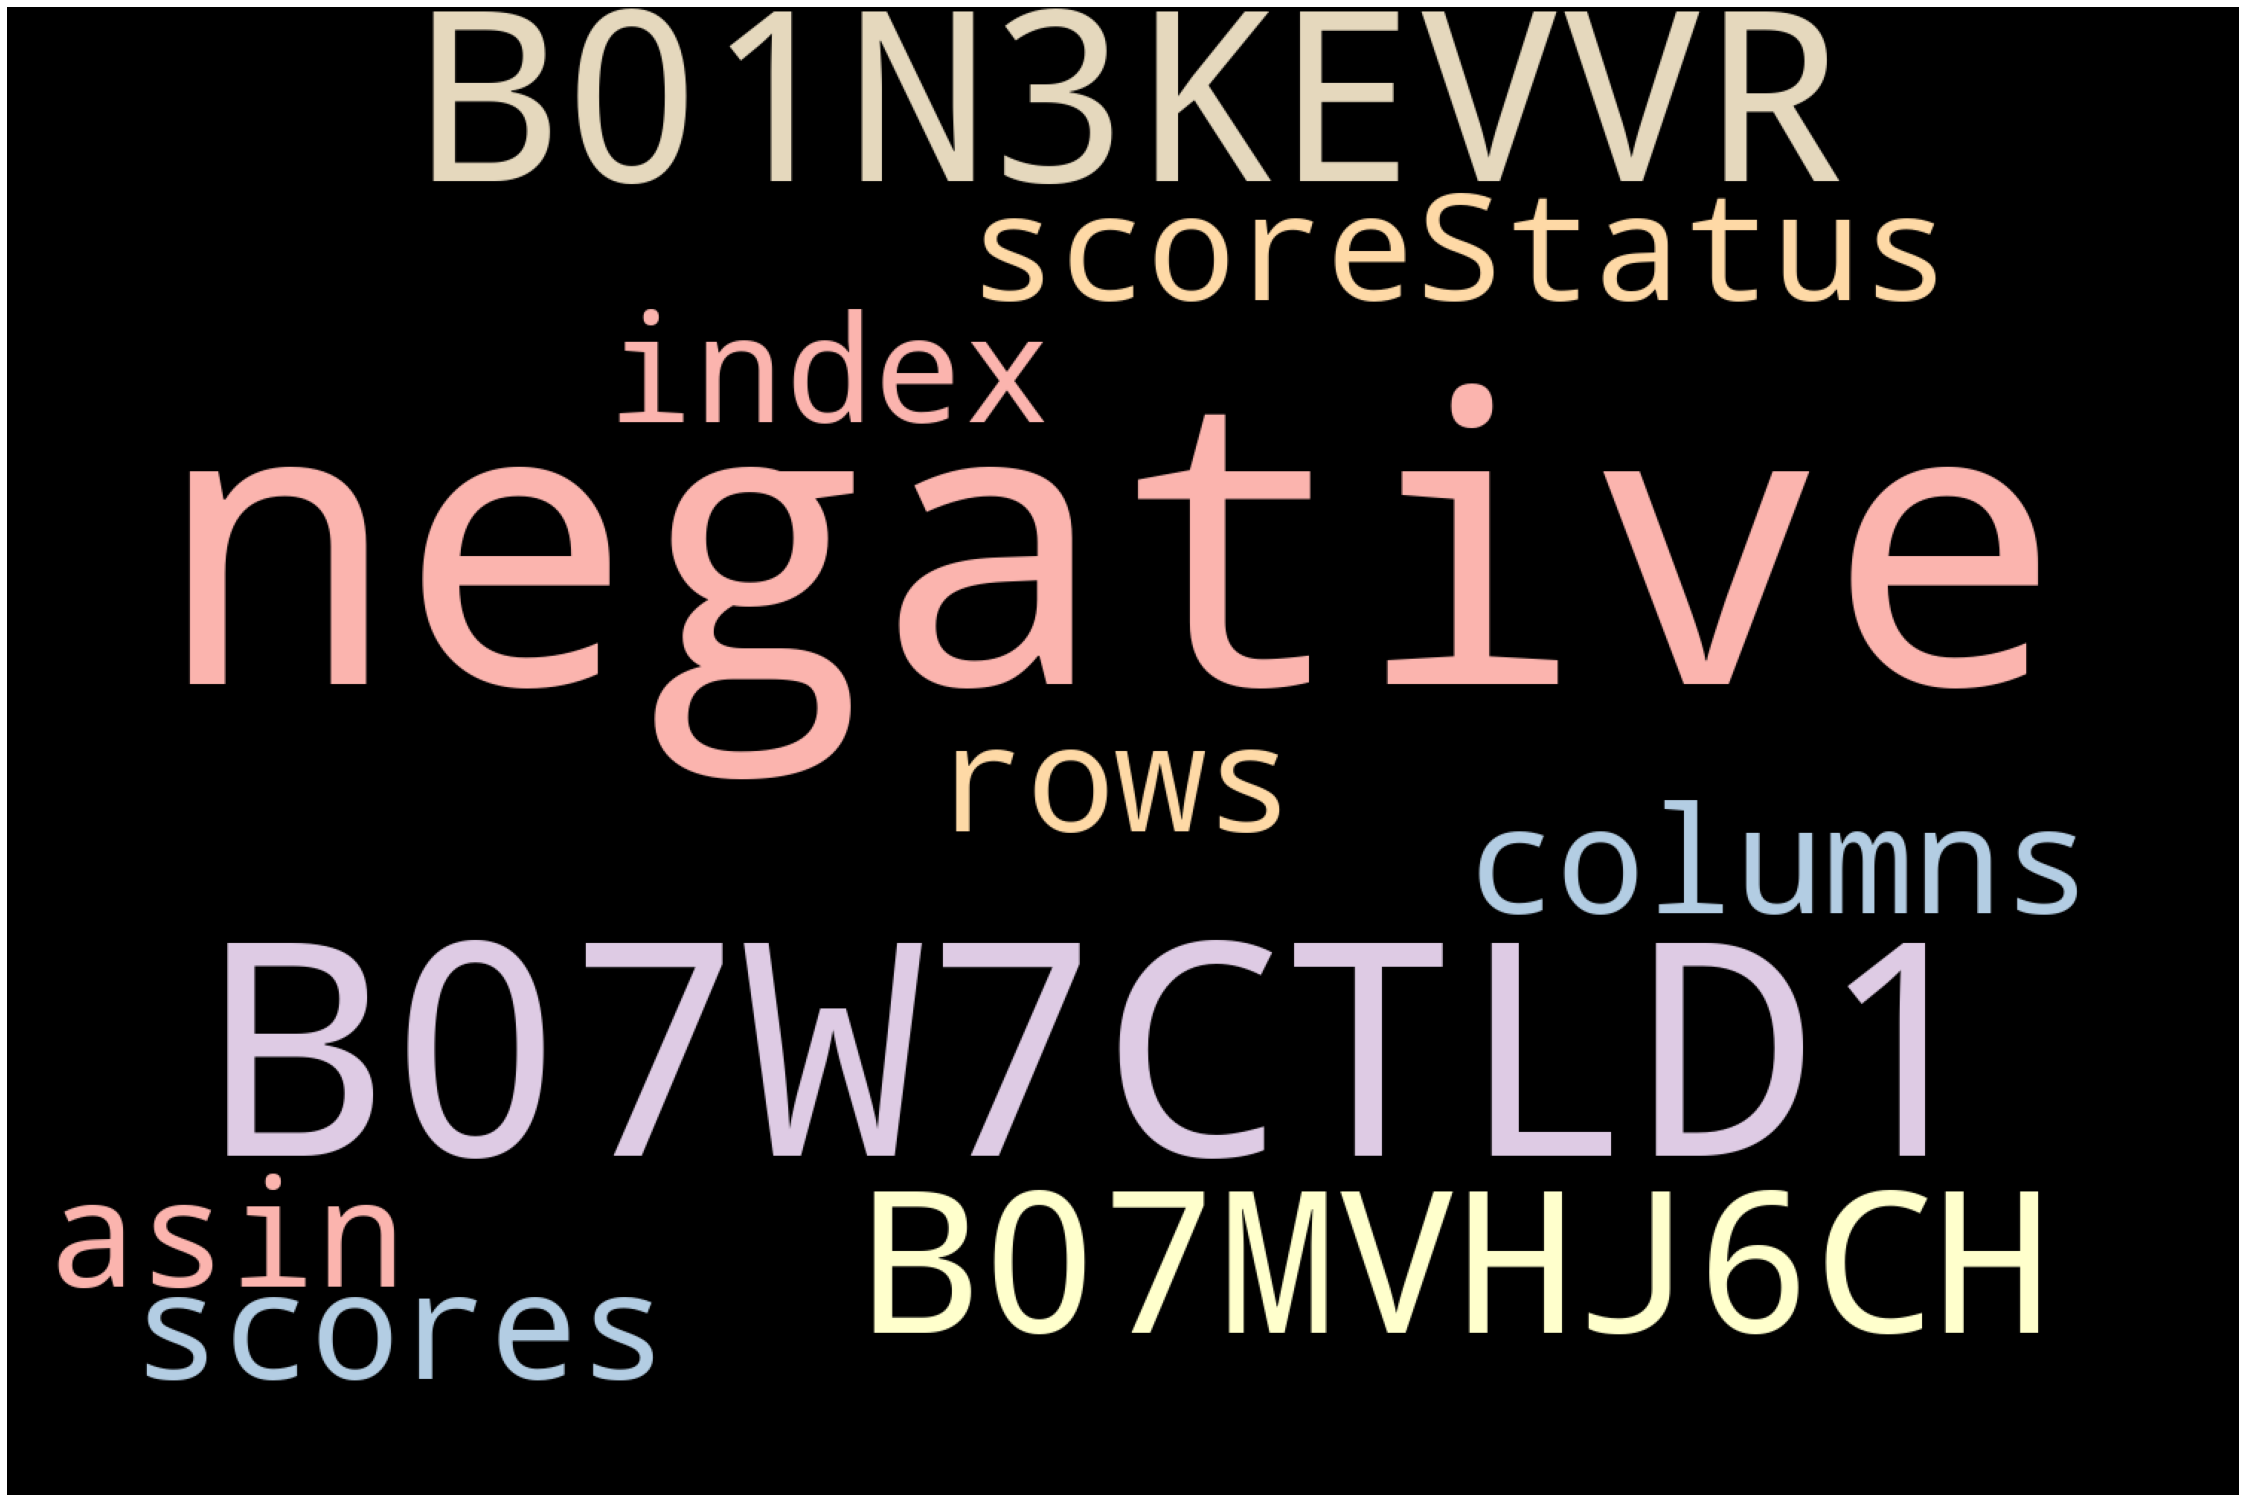

In [64]:
# print wordcloud
negativeReviews =train.loc[train['scoreStatus'] == "negative"]
#positiveReviews

# Generate word cloud
wordcloud = WordCloud(width = 1500, height = 1000, random_state=1, background_color='black', colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS).generate(str(negativeReviews))
# Plot
plot_cloud(wordcloud)

In [67]:
features = CountVectorizer()
features.fit(train["review_text"])
print(len(features.vocabulary_))
print(features.vocabulary_)

4624
{'bought': 472, 'this': 4125, 'hair': 1787, 'oil': 2777, 'after': 99, 'viewing': 4396, 'so': 3733, 'many': 2430, 'good': 1713, 'comments': 776, 'but': 549, 'product': 3137, 'is': 2103, 'not': 2706, 'enough': 1322, 'first': 1514, 'of': 2764, 'all': 128, 'it': 2107, 'expensive': 1389, 'second': 3549, 'thing': 4118, 'the': 4098, 'amount': 169, 'low': 2367, 'half': 1794, 'bottle': 469, 'yes': 4605, 'completely': 805, 'filled': 1497, 'with': 4545, 'if': 1973, 'you': 4610, 'cheating': 665, 'on': 2793, 'your': 4612, 'customers': 955, 'mamaearth': 2415, 'trust': 4250, 'me': 2467, 'can': 577, 'fool': 1559, 'people': 2947, 'more': 2602, 'than': 4088, 'once': 2794, 'now': 2724, 'know': 2191, 'that': 4096, 'brand': 483, 'am': 153, 'going': 1708, 'to': 4176, 'buy': 556, 'any': 196, 'from': 1619, 'again': 102, 'thumbs': 4148, 'down': 1215, 'for': 1561, 'onion': 2797, 'used': 4339, 'mama': 2414, 'earth': 1259, 'newly': 2676, 'launched': 2227, 'twice': 4267, 'and': 176, 'must': 2638, 'say': 3511,

In [69]:
bagofWords = features.transform(train["review_text"])
print(bagofWords)
print(bagofWords.toarray())

  (0, 99)	1
  (0, 102)	1
  (0, 128)	1
  (0, 153)	1
  (0, 169)	1
  (0, 196)	1
  (0, 469)	2
  (0, 472)	1
  (0, 483)	2
  (0, 549)	1
  (0, 556)	1
  (0, 577)	1
  (0, 665)	1
  (0, 776)	1
  (0, 805)	1
  (0, 955)	1
  (0, 1215)	1
  (0, 1322)	2
  (0, 1389)	1
  (0, 1497)	1
  (0, 1514)	1
  (0, 1559)	1
  (0, 1561)	1
  (0, 1619)	1
  (0, 1708)	1
  :	:
  (2774, 2640)	1
  (2774, 3082)	1
  (2774, 3735)	1
  (2776, 3137)	1
  (2776, 3958)	1
  (2777, 176)	1
  (2777, 392)	1
  (2777, 881)	1
  (2777, 1037)	1
  (2777, 1232)	1
  (2777, 1561)	2
  (2777, 1590)	1
  (2777, 1930)	2
  (2777, 1947)	1
  (2777, 1970)	1
  (2777, 1999)	1
  (2777, 2103)	1
  (2777, 2248)	1
  (2777, 2598)	2
  (2777, 3339)	1
  (2777, 3697)	1
  (2777, 3735)	1
  (2777, 3775)	1
  (2777, 3951)	2
  (2777, 4508)	1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [70]:
print(features.get_feature_names())

['00', '000', '0000', '00g', '00gm', '00grm', '00it', '00ml', '00rs', '09', '0calories', '0days', '0gm', '0gms', '0ltrs', '0m', '0min', '0ml', '0rs', '0s', '0thickness', '0value', '90', '90s', '99', '9itemsin', '9th', 'aa', 'aam', 'aamras', 'abandon', 'abck', 'able', 'about', 'above', 'abroad', 'absence', 'absolute', 'absolutely', 'absorbed', 'absorbing', 'abt', 'accept', 'accepted', 'access', 'accessibility', 'accompanied', 'accompaniment', 'according', 'account', 'accounts', 'accurate', 'accustomed', 'acetate', 'acid', 'acidic', 'acne', 'acnei', 'acnes', 'across', 'action', 'actions', 'active', 'actives', 'actual', 'actually', 'ad', 'add', 'added', 'addicted', 'adding', 'addition', 'additional', 'additives', 'address', 'adds', 'adequate', 'adjust', 'admit', 'adrak', 'adult', 'adulterated', 'adulteration', 'adultery', 'adults', 'advantage', 'adverse', 'adversely', 'advertised', 'advertisement', 'advertising', 'advice', 'advised', 'aer', 'aermatic', 'affair', 'affect', 'affordability',

#Training the Model

In [73]:
df = pd.concat([positiveReviews,negativeReviews])
df = df[["review_text","scoreStatus"]]
df['scoreStatus'] = (df['scoreStatus'] == 'positive')*1
X = train["review_text"]
y = train["scoreStatus"]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [74]:
X_train = features.fit_transform(X_train)
X_test = features.transform(X_test)

In [79]:
#k fold cross validation with k=5
scores = cross_val_score(LogisticRegression(),X_train,y_train,cv=5)
print(np.mean(scores))

0.9202607796888665


In [80]:
model=LogisticRegression()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.992798353909465
0.9520383693045563


In [83]:
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[147,   2,  13],
       [  0,  52,  14],
       [ 11,   0, 595]])

In [95]:
text = ["the oil is good", "the book is fantastic"]
rev = model.predict(features.transform(text))
print(rev[0],rev[1])

positive positive
